In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/celebrity classifier'

/content/drive/MyDrive/celebrity classifier


In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [15]:
path = '/content/drive/MyDrive/celebrity classifier/detecttion testing smple'

In [16]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/celebrity classifier/haarcascade_frontalface_default.xml')

In [17]:
img_dir = []
for images in os.listdir(path):
  image_dirs = os.path.join(path, images)
  img_dir.append(image_dirs)

In [18]:
#list of all of the images to be classified
img_list = []
for i in img_dir:
  img = cv2.imread(i)
  if img is None:
    continue
  face = face_cascade.detectMultiScale(img)

  if len(face) == 1:
    img_list.append(img)

In [11]:
model = load_model('/content/drive/MyDrive/celebrity classifier/new_model.h5')

  CREATING A FUNCTION FOR OBJECT DETECTION

In [23]:
#detection algorithm
def detection(image):
  face = face_cascade.detectMultiScale(image)
  for x,y,w,h in face:
    class_img = image[y:y+h, x:x+w]
    class_resize = cv2.resize(class_img, (200, 200))
    class_4 = np.expand_dims(class_resize, axis=0)
    prediction = model.predict(class_4).argmax()
    
    if prediction == 0:
      img = cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 2)
      label = cv2.putText(image, 'Ronaldinho', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    elif prediction == 1:
      img = cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 2)
      label = cv2.putText(image, 'einstein', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    elif prediction == 2:
      labe =  cv2.putText(image, 'Elon Musk', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    return label

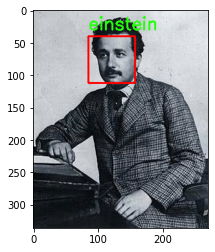

In [28]:
plt.imshow(detection(img_list[22]))